In [7]:
# Import standard libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Time Series analysis tools
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set(style="whitegrid")  # Set seaborn style for consistent visuals


# Cell 2: Markdown cell for helper functions
### Helper Functions
These functions help load data, prepare the dataset, and conduct repetitive tasks such as calculating and plotting ACF and PACF.


In [8]:
# Helper Functions
def load_and_prepare_data(filepath):
    """Loads data, converts date column and sets it as index."""
    try:
        data = pd.read_csv(filepath)
        data['Date'] = pd.to_datetime(data['Date'], format="%Y%m")
        data.set_index('Date', inplace=True)
        return data
    except FileNotFoundError:
        print(f"The file {filepath} does not exist.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def display_dataset_head_and_info(dataset):
    """Displays the first 5 rows and data types of the dataset."""
    display(dataset.head())
    print(dataset.shape)
    print(dataset.dtypes)


def compute_and_print_acf_pacf(series, nlags):
    """Computes and prints the ACF and PACF values up to a specified number of lags."""
    acf_values = acf(series, nlags=nlags)
    pacf_values = pacf(series, nlags=nlags, method="ols")

    for i in range(nlags + 1):
        print(f"Lag {i}: ACF = {np.round(acf_values[i], 2)}, PACF = {np.round(pacf_values[i], 2)}")


def plot_acf_pacf(series, nlags):
    """Plots the ACF and PACF for a series."""
    fig_acf, fig_pacf = plt.figure(figsize=(10, 9)), plt.figure(figsize=(10, 9))
    plot_acf(series, lags=nlags, ax=fig_acf.gca())
    plot_pacf(series, lags=nlags, method='ols', ax=fig_pacf.gca())
    plt.show()


# Cell 4: Markdown cell for Main Analysis
### Main Analysis
This section carries out the main analysis steps: loading data, inspecting it, and performing time series analysis.


,Total Passenger Count
Date,
2006-01-01,2448889
2006-02-01,2223024
2006-03-01,2708778
2006-04-01,2773293
2006-05-01,2829000


(132, 1)
Total Passenger Count    int64
dtype: object

Data types after Date transformation and setting as index:
Total Passenger Count    int64
dtype: object

Autocorrelation and Partial Autocorrelation Values:
Lag 0: ACF = 1.0, PACF = 1.0
Lag 1: ACF = 0.87, PACF = 0.88
Lag 2: ACF = 0.76, PACF = 0.05
Lag 3: ACF = 0.61, PACF = -0.24
Lag 4: ACF = 0.47, PACF = -0.13
Lag 5: ACF = 0.37, PACF = 0.21
Lag 6: ACF = 0.26, PACF = -0.04
Lag 7: ACF = 0.33, PACF = 0.75
Lag 8: ACF = 0.38, PACF = 0.18
Lag 9: ACF = 0.49, PACF = 0.4
Lag 10: ACF = 0.59, PACF = 0.1
Lag 11: ACF = 0.67, PACF = 0.44
Lag 12: ACF = 0.76, PACF = 0.74
Lag 13: ACF = 0.64, PACF = -0.63
Lag 14: ACF = 0.55, PACF = -0.19
Lag 15: ACF = 0.41, PACF = -0.1
Lag 16: ACF = 0.28, PACF = 0.01
Lag 17: ACF = 0.19, PACF = 0.21
Lag 18: ACF = 0.1, PACF = 0.0
Lag 19: ACF = 0.16, PACF = -0.03
Lag 20: ACF = 0.21, PACF = 0.32
Lag 21: ACF = 0.31, PACF = 0.06
Lag 22: ACF = 0.41, PACF = 0.24
Lag 23: ACF = 0.48, PACF = 0.09
Lag 24: ACF = 0.56, PACF = 0.1

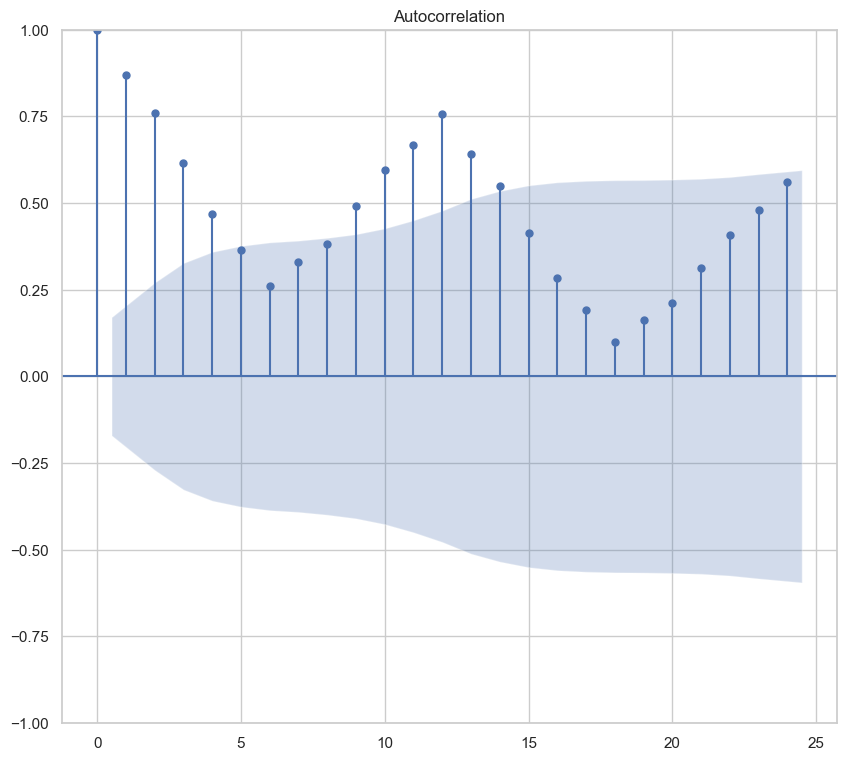

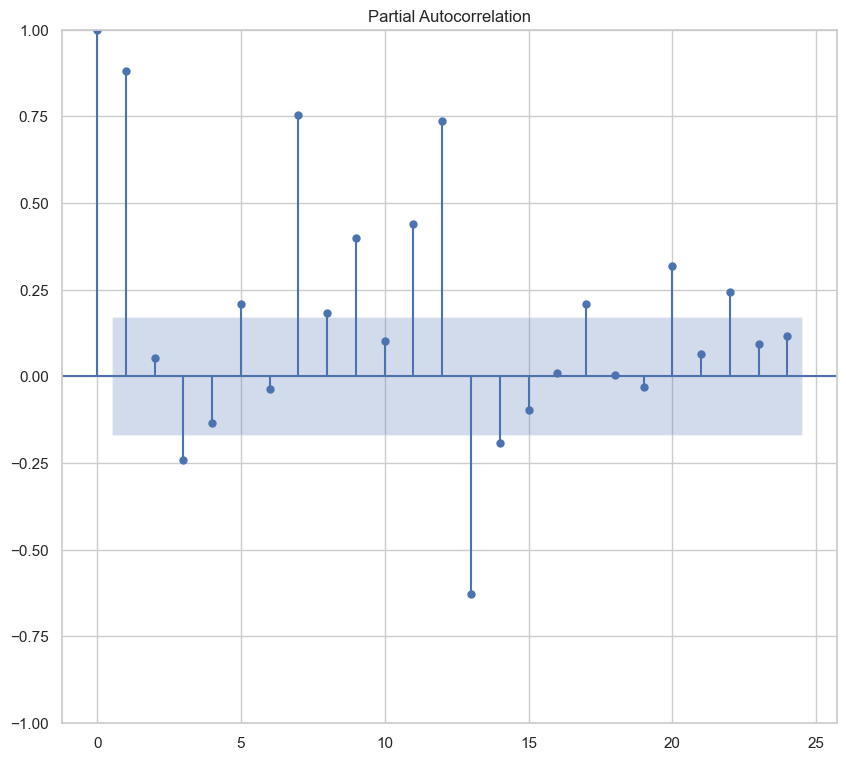

In [9]:
# Main Analysis
# Main constants
FILE_PATH = "SF_Air_Traffic_Passenger_Statistics_Transformed.csv"
N_LAGS = 24

# Load and prepare data
air_traffic_data = load_and_prepare_data(FILE_PATH)

# If data is successfully loaded, proceed with analysis
if air_traffic_data is not None:
    # Display dataset information
    display_dataset_head_and_info(air_traffic_data)

    # Data types after Date transformation and setting as index
    print("\nData types after Date transformation and setting as index:")
    print(air_traffic_data.dtypes)

    # Compute and display ACF and PACF
    print("\nAutocorrelation and Partial Autocorrelation Values:")
    compute_and_print_acf_pacf(air_traffic_data['Total Passenger Count'], N_LAGS)

    # Plot ACF and PACF
    plot_acf_pacf(air_traffic_data['Total Passenger Count'], N_LAGS)
